# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [134]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

#print(data1.shape[0]) 1000개
#print(data2.shape[0]) 1000개
num_data = data1.shape[0]


label_1 = np.zeros(num_data)
label_2 = np.zeros(num_data)

for i in range(num_data):

    label_1[i] = data1[i,2]
    label_2[i] = data2[i,2]

    
#print(label_1.shape)
# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

## plot the data

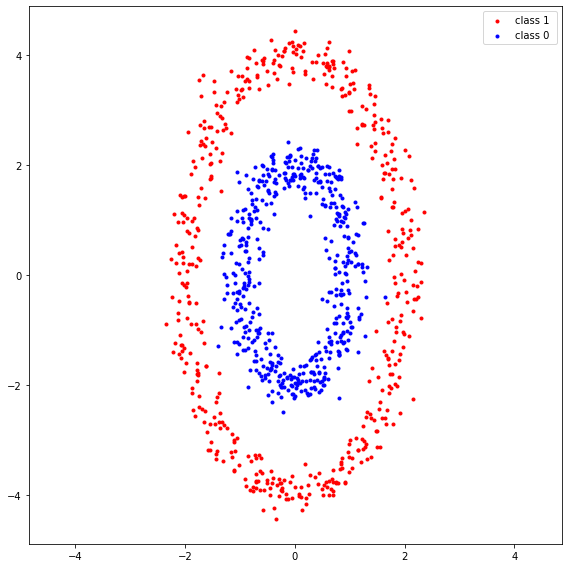

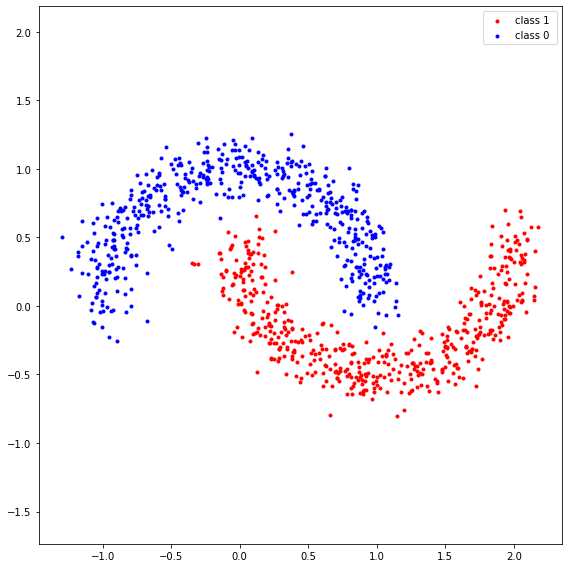

In [135]:
plt.figure(figsize=(8,8))
plt.scatter(data1[:, 0][label_1 == 1],data1[:, 1][label_1 == 1], c="r", marker=".", label="class 1 ")
plt.scatter(data1[:, 0][label_1 == 0],data1[:, 1][label_1 == 0], c="b", marker=".", label="class 0 ")

plt.axis('equal')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(8,8))
plt.scatter(data2[:, 0][label_2 == 1],data2[:, 1][label_2 == 1], c="r", marker=".", label="class 1 ")
plt.scatter(data2[:, 0][label_2 == 0],data2[:, 1][label_2 == 0], c="b", marker=".", label="class 0 ")

plt.axis('equal')
plt.legend()
plt.tight_layout()

plt.show()

## define the feature function for each data to obtain the best accuracy

In [136]:
def feature_function1(x, y):
    
    feature = np.array([np.ones(x.size),x,y,x**2,y**2])
    
    return feature

In [137]:
def feature_function2(x, y):
  
    feature = np.array([np.ones(x.size),x**2,y**2,x**3,y**3])

    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [138]:
def regression_function(theta, feature):
    
    value = np.dot(theta,feature)
    
    return value

## define sigmoid function with input $x$

In [139]:
def logistic_function(theta,feature):
    
    f = regression_function(theta,feature)
    z = 1/(1+np.exp(-f))
    
    #print(z.shape)
    
    return z

## define loss function with feature and label based on the logistic regression

In [140]:
def compute_loss_feature(theta, feature, label):
    h = logistic_function(theta,feature)
    t = 0.00001
    loss = 0
    loss = -((1/num_data)* (np.dot(label, np.log(h + t) ) + np.dot((1-label),np.log(1-h + t) ) ))
    
    return loss

## define gradient vector for the model parameters $\theta$

In [141]:
def compute_gradient_feature(theta, feature, label):    
    X = feature
    h = logistic_function(theta,feature)
    l = label
    gradient = (1/num_data)*np.dot(X,(h-l))
    
    return gradient

## compute the accuracy

In [142]:
def compute_accuracy(theta, feature, label):
    
    h = np.array( logistic_function(theta,feature) )
    #print("h",h)
    computed_label = (h >= 0.5)
    #print("computed_label",computed_label)
    correct_matrix = (computed_label.astype(int) == label).astype(int)
    #print(correct_matrix)
    correct = np.sum(correct_matrix)
    #print("correct",correct)
    accuracy = correct/num_data
   
    return accuracy

## gradient descent for the model parameters $\theta$

In [143]:
num_iteration   = 7000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.65   # USE THIS VALUE for the learning rate

theta1 = np.array((0,0,0,0,0))
theta2 = np.array((0,0,0,0,0))

theta1_iteration =np.zeros((num_iteration, theta1.size))
loss1_iteration = np.zeros(num_iteration, dtype=object)

theta2_iteration =np.zeros((num_iteration, theta2.size))
loss2_iteration = np.zeros(num_iteration, dtype=object)


In [144]:
feature1 = feature_function1(data1[:, 0],data1[:, 1])
feature2 = feature_function2(data2[:, 0],data2[:, 1])

In [145]:
for i in range(num_iteration):
    theta1 = theta1 - learning_rate * compute_gradient_feature(theta1, feature1, label_1)
    theta2 = theta2 - learning_rate * compute_gradient_feature(theta2, feature2, label_2)
    
    loss1 = compute_loss_feature(theta1, feature1, label_1)
    loss2 = compute_loss_feature(theta2, feature2, label_2)
    
    theta1_iteration[i] = theta1
    theta2_iteration[i] = theta2
    loss1_iteration[i] = loss1
    loss2_iteration[i] = loss2
    
    #print("loss1",loss1_iteration[i]," theta1",theta1_iteration[i])
    #print("loss2",loss2_iteration[i]," theta2",theta2_iteration[i])



theta1_optimal = theta1
theta2_optimal = theta2

## compute accuracy of the classifiers

In [146]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label_1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label_2)

#print("accuracy_classifier1",accuracy_classifier1)
#print("accuracy_classifier2",accuracy_classifier2)

## plot the results

In [147]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    plt.plot(loss_iteration, color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [148]:
def plot_data(data):
    
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    
    plt.scatter(data[:, 0][label_1 == 1],data[:, 1][label_1 == 1], c="r", marker=".", label="class 1 ")
    plt.scatter(data[:, 0][label_1 == 0],data[:, 1][label_1 == 0], c="b", marker=".", label="class 0 ")

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()

    plt.show()

In [149]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    
    plt.title('model parameter')
    
    plt.plot(theta_iteration[:,0],color = 'red' , label = "$\Theta_0$")
    plt.plot(theta_iteration[:,1],color = 'green', label = "$\Theta_1$")
    plt.plot(theta_iteration[:,2],color = 'blue' , label = "$\Theta_2$")
    plt.plot(theta_iteration[:,3],color = 'gold' , label = "$\Theta_3$")
    plt.plot(theta_iteration[:,4],color = 'm' , label = "$\Theta_4$")

    

    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

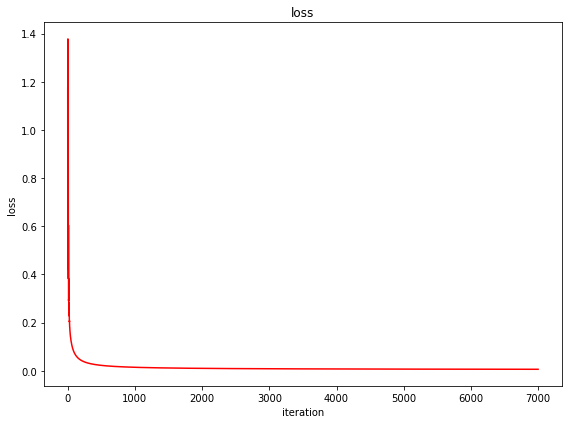

In [150]:
plot_loss_curve(loss1_iteration)

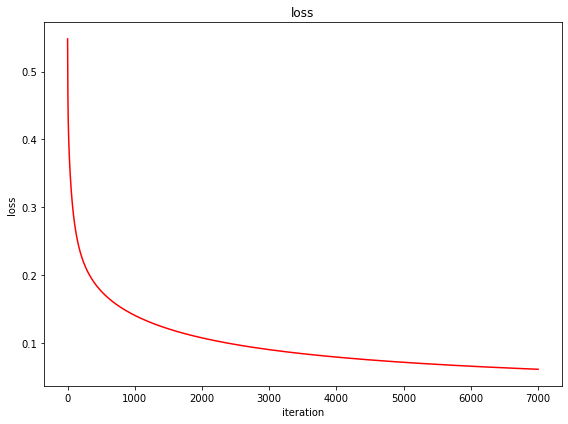

In [151]:
plot_loss_curve(loss2_iteration)

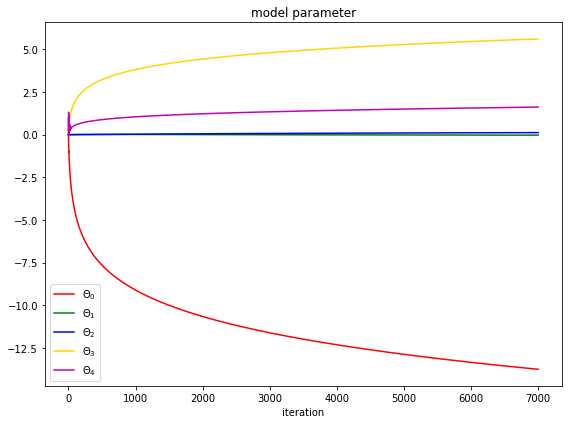

In [152]:
plot_model_parameter(theta1_iteration)

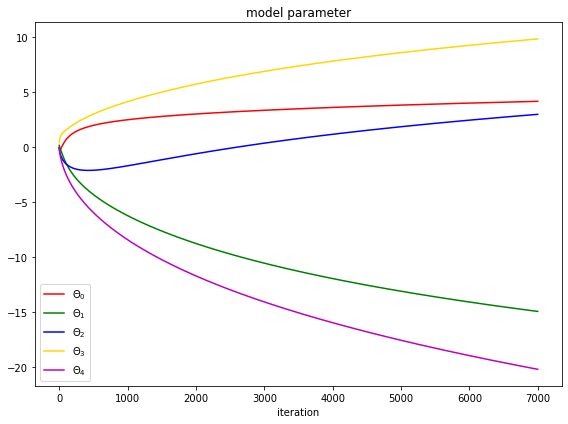

In [153]:
plot_model_parameter(theta2_iteration)

In [154]:
def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
        
    t = 0.01
    x_min, x_max = data[:,0].min(), data[:,0].max()
    y_min, y_max = data[:,1].min(), data[:,1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, t), np.arange(y_min, y_max, t))
    
    X = xx.ravel()
    Y = yy.ravel()
    
    feature = feature_function1(X, Y)
    h = regression_function(theta, feature)
    Z = h.reshape(xx.shape)
    
    cntr = plt.contourf(xx, yy,Z,cmap = plt.get_cmap('RdBu_r'),levels = 90, vmin = -25, vmax = 25)
    plt.colorbar(cntr) 

    plt.scatter(data[:, 0][label_1 == 1],data[:, 1][label_1 == 1], c="r", marker=".",label="class 1 ")
    plt.scatter(data[:, 0][label_1 == 0],data[:, 1][label_1 == 0], c="b", marker=".",label="class 0 ")
    
    plt.contour(xx,yy,Z,levels=[0],colors ="black")
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [155]:
def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    t = 0.01
    x_min, x_max = data[:,0].min(), data[:,0].max()
    y_min, y_max = data[:,1].min(), data[:,1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, t), np.arange(y_min, y_max, t))
    
    X = xx.ravel()
    Y = yy.ravel()
    
    feature = feature_function2(X, Y)
    h = regression_function(theta, feature)
    Z = h.reshape(xx.shape)
    
    cntr = plt.contourf(xx, yy,Z,cmap =  plt.get_cmap('RdBu_r') ,levels = 90, vmin = -25, vmax = 25)
    plt.colorbar(cntr)    
    

    plt.scatter(data[:, 0][label_2 == 1],data[:, 1][label_2 == 1], c="r", marker=".",label="class 1 ")
    plt.scatter(data[:, 0][label_2 == 0],data[:, 1][label_2 == 0], c="b", marker=".",label="class 0 ")
    
    plt.contour(xx,yy,Z,levels=[0],colors ="black")
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

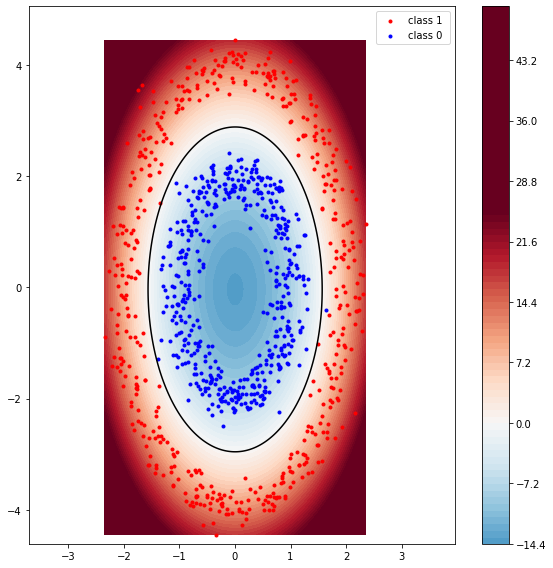

In [156]:
plot_classifier1(data1, theta1_optimal)

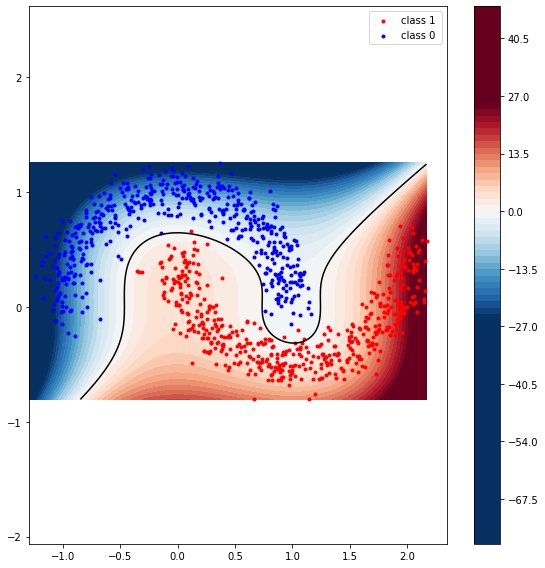

In [157]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

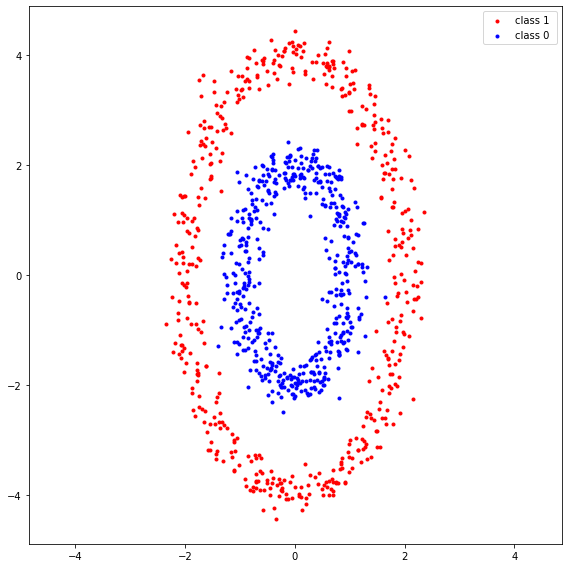

In [158]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

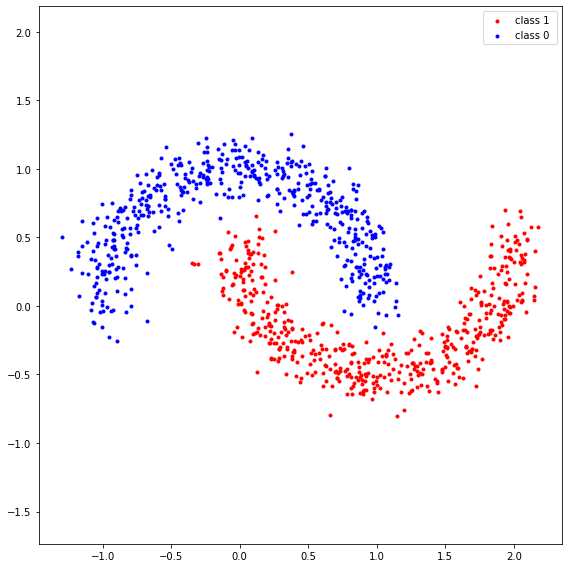

In [159]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

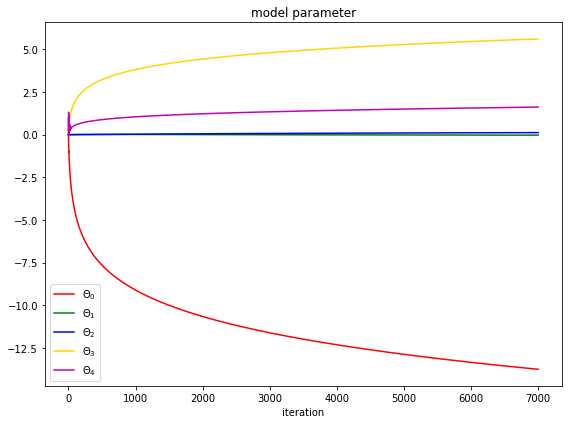

In [160]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

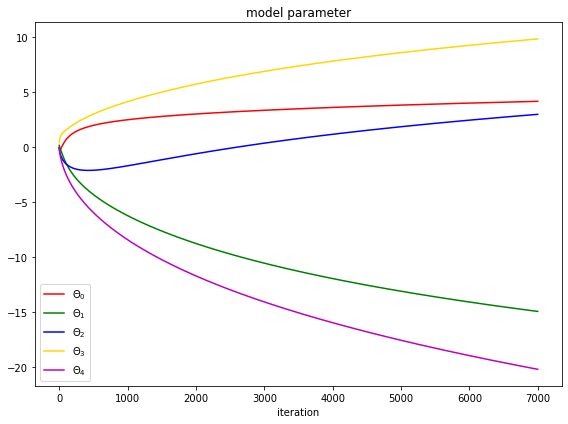

In [161]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

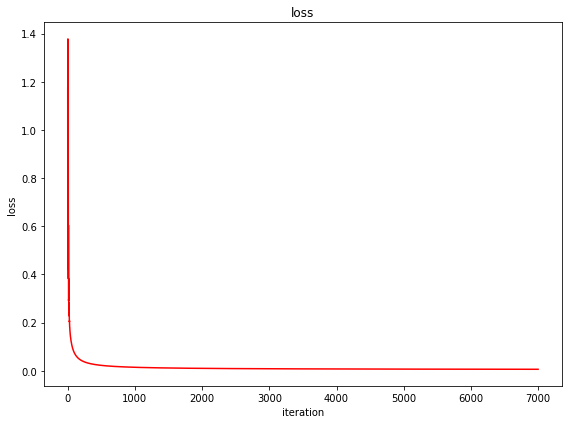

In [162]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

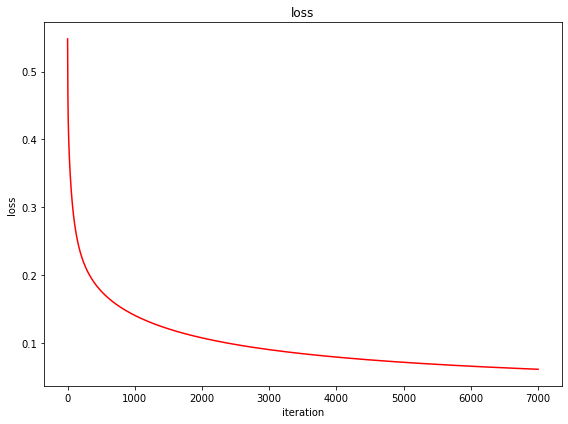

In [163]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

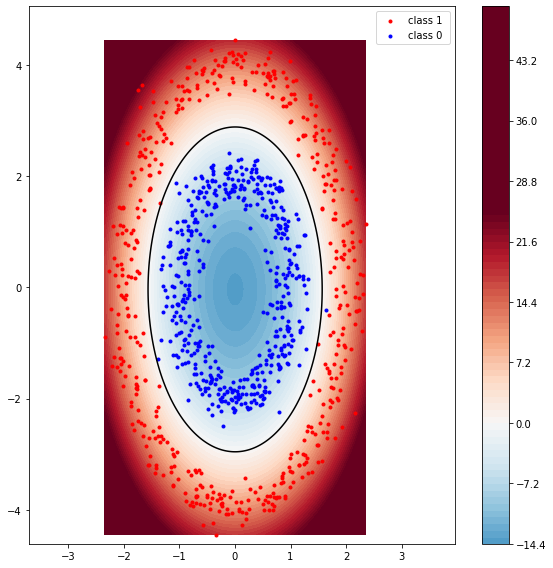

In [164]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

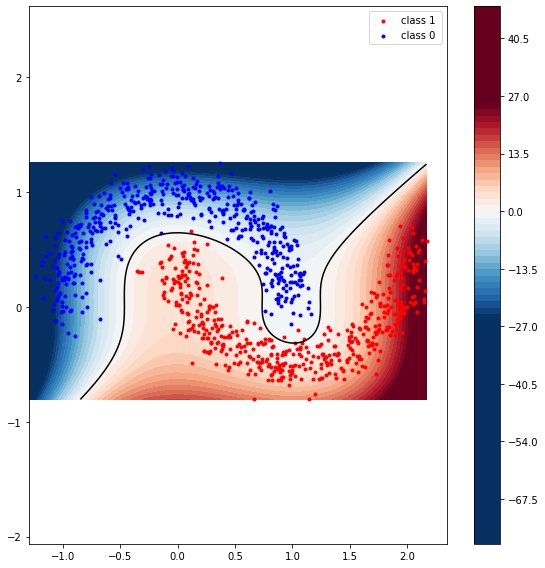

In [165]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [166]:
print(accuracy_classifier1)

0.999


### # 10. print out the accuracy of the obtained classifier2 for data1

In [167]:
print(accuracy_classifier2)

0.996
